# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'trafficsigns/train.p'
testing_file = 'trafficsigns/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [3]:
print(len(train['features']))
print(len(test['features']))
print(X_train[0].shape)
print(len(set(train['labels'])))

39209
12630
(32, 32, 3)
43


In [4]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(train['features'])

# TODO: Number of testing examples.
n_test = len(test['features'])

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(train['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

So, to explore the data, I assumed that the simplest thing to do, was to plot a histogram of the data. We can divide it in n_classes, which we calculated above. Perhaps, later on, I can revisit, to add more interesting models. 

10


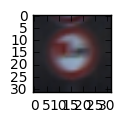

In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

(array([  169.,  1781.,  1799.,  1134.,  1578.,  1485.,   332.,  1143.,
         1147.,  1189.,  1619.,  1040.,  1691.,  1730.,   614.,   513.,
          329.,   884.,   982.,   176.,   286.,   261.,   313.,   411.,
          203.,  1181.,   467.,   193.,   415.,   212.,   349.,   623.,
          201.,   576.,   348.,   983.,   317.,   161.,  1627.,   235.,
          289.,   186.,   195.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

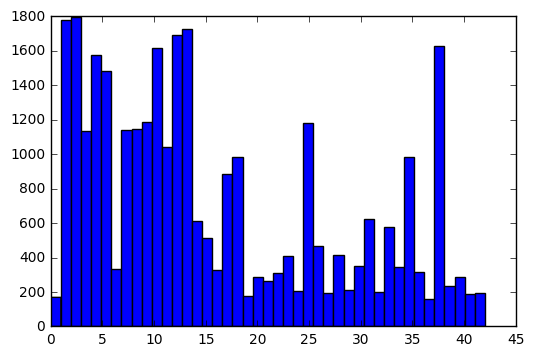

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(y_train, bins = n_classes)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [7]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

For now, I opted to follow the technique of shuffling the data. The reason for this is that my network wouldn't be biased because of the training data, in that it would be dependent on this data.

A second option I tried, was going for a grayscale option of the images. Conceptually, color does not have to play a big part in processing the images, I believed. When looking at the problem from a shape-view, all the different traffic signs could be discovered without any color. After all, color blind people have to understand traffic signs too. 
Grayscaling could also have the neural network perform better.
However, all things considered, grayscaling didn't help much. I did leave the basic rgb code, maybe to revisit afterwards.

In [8]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I'm afraid my answer is rather short here: I went on from the data we received for this assignment.
The addition I made for the validation dataset, was to split off 20% of the data for the validation of the model (see at the top). 

At this point, I was still grasping everything I had to do here, so I did not go on to add additional data. 
//Some time later: I did not add further data. The deadline for the lab is over at this point, so I'm going to go ahead and submit this, and revisit this later on. 

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 15
BATCH_SIZE = 128

In [10]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.avg_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout
    fc1    = tf.nn.dropout(fc1, dropout_rate)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
     # Dropout
    fc2    = tf.nn.dropout(fc2, dropout_rate)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [11]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
dropout_rate = tf.placeholder(tf.float32)

In [12]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [ ]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, dropout_rate: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I started out with the LeNet convolutional network, which we ended up with in the lectures. The reason for this is that it performed rather well on the images, with 2 convolutional layers, and 3 fully connected layers.

**Addition 1 after review** 

_Required_

_The rubric requires that for Question 3, the answer contains a description of the final architecture._

_I understand that LeNet has quite a simple architecture, but the idea here is that you describe your final work as a means to measure your understanding of what's going on there._

_Adding a description of the layers and their most important parameters is enough._


The review required me to go into deeper detail in what the, or rather: my, LeNet architecture looked like in detail. 
- **2 convolutional layers, each in its followed by an ReLu and a pooling function (basically, the hidden functions)**: the basic idea of a convolutional network (in image processing) is that you basically combine a cluster of pixels from the original image, into a smaller (width and height are smaller) yet 'deeper' (there is more depth) filter. Actually, theoretically, you are expressing what happens in your brain when you see and identify an object: instead of each neuron to work on its own, neurons tend to cluster together, to identify concepts. Furthermore, concepts on a lower level can be combined to concepts on a higher level. We've seen an example of this in the lecture, where parts of an image of a labrador were first identified on a lower level, combining neighbouring pixels. Later on, in the following convolutional network, the same sort of combination was done, to identify higher level concepts. The math is also simpler, by consequence: instead of having each pixel have its own weight, weights are shared for multiple pixels. That means that in essence, we need less parameters for our neural network. We have always worked with 32x32x3 images, but imagine what a 1920x1080x3 image would do to your parameter space.
In Tensorflow, the parameters used are: 
    - x, being the input tensor to the layer
    - conv_W, the weights, which in this case consist of a tensor of random values from a normal distribution, with mean 0 and sd 0.1 . In Tensorflow, this means moreover that values whose magnitude is larger than 2 times the standard deviation, they are repicked.
    - the stride, which we set to 1
    - 'VALID' padding: I particulary stuck with 'VALID', since I understood that this makes the math easier, though I have to admit: I have not tried to go with 'SAME' here. 
    - the bias, conv_b, which is essentially zero (a matrix, which consists of 0's).

The ReLu is present as an activation function. This has 2 functions: (1) turning off any negative weights; (2) making the complete network non-linear, which allows it to solve more complex problem (as opposed to a linear network, which can be composed as multiple linear steps, but end up being ... well, as 1 big linear function). A sigmoid is a function we also have seen in the lectures, but in the last few years, the rectifier function has shown itself as the most popular and the most efficient in convolutional networks. I have to admit here, I stuck with the ReLu as is. 
    - The parameter for this function is simply the output of the convolutional layer.

The pooling function helps to prevent overfitting to the training data, and also reduces the number of parameters, so the computation goes faster. I switched to avgpool here (instead of maxpool), because I got better results on the accuracy (see initial discussion below).
In Tensorflow, following parameters are used: 
    - the input layer, namely: the output of the ReLu
    - ksize: the size of the window for the pooling 
    - strides: the size of the strides 
    - padding: I went for 'VALID' here, mainly for the same reasons as above

- **A flatten function**: the flatten function flattens the 3D tensor, which is the result from the previous 2 convolutional layers, keeping the batches, and flattening all the other dimensions into the second dimension of the output tensor. This resuls in a 2D tensor, which can be used a input for the fully connected layers. The sole parameter here is the output of the previous layer.

- **2 fully connected layers, each in its term followed by an activation function and a dropout function**:
The end point of the neural network, and the place where the actual higher level reasoning is done: in the fully connected layers. The fully connected layers takes in all the neurons on the input, and connects it to every single neuron it has. In the first two runs, we use a relu and dropout as hidden layers for the networks, mostly for the same reasons as above: the turn of any negative weights, and to prevent overfitting to the data. Here, I also got the best results with avgpool.
The parameters are the following
    - Fully connected layer
        - Not much parameters here, actually we're doing the same as for the convolutional layers: we construct a tensor of random values from a normal distribution, with mean 0 and sd 0.1 . After that, we perform the linear function for the fully connected layer
    - ReLu: see above, simply the output of the fully connected layer
    - Dropout: the tf.nn.dropout() function takes in two parameters:
        - hidden_layer: the tensor to which we will be applying dropout
        - keep_prob: the probability of keeping (i.e. not dropping) any given unit. For the training, I chose 0.5, whereas I chose 1.0 for the validation. This essentially means that for the training, I dropped half of the values at random, whereas I kept all the values in the validation phase. 

- **A final fully connected layer**:
The final layer is a fully connected layer, and calculates the eventual logits.

These are the sizes: 
* 32x32x3 -> 28x28x6 (first conv layer)
* 28x28x6 -> 14x14x6 (after pooling)
* 14x14x6 -> 10x10x16 (second conv layer)
* 10x10x16 -> 5x5x16 (after pooling)
* 5x5x16 -> 400 (flatten function)
* 400 -> 120 (first fully connected layer)
* 120 -> 84 (second fully connected layer)
* 84 -> 10 (third fully connected layer)
**End addition 1 after review**

First addition I made, was to add a dropout layer to the first 2 fully connected layers, to prevent overfitting. Validation accuracy went up, but at first, the test accuracy only marginally went up. The numbers were less far apart though, so less overfitting to the data was done, which was the whole point of adding the dropout. 

Second addition I made, was switching the maxpool to the avgpool. I have to admit, it started out as an experiment, but it had actually a quite positive effect on my neural network: validation accuracy got up to nearly 99%, whereas the testing accuracy reached 92%+. 

Admittedly, I'm still learning everything here. Most of my attempts were trying to put the lectures into practice, but it still feels like I'm at the beginning of the path to confidence in using all these techniques.

**Addition 2 after review**
_Required

_Why do you believe the dropout layers improved your model? What was the reason for adding those?_
Dropout is mainly used to prevent overfitting to the training data. Before adding the dropout, I had a high accuracy number of validation (something along the lines of 92%), but the training data had a rather low number of accuracy (somewhere in the vicinity of 80%). This made me think that the network was overfitting to the training data, which was the reason why I added dropout. 

_Also, why do you believe this architecture is a good fit for this problem?_
If I understood the lectures correctly, I think that LeNet is built around the convolutional and maxpooling layers. I discussed the convolutional layer above, speaking about the fact that the basic idea of a convolutional network (in image processing) is that you combine a cluster of pixels from the original image, into a smaller (width and height are smaller) yet 'deeper' (there is more depth) filter. Actually, theoretically, you are expressing what happens in your brain when you see and identify an object: instead of each neuron to work on its own, neurons tend to cluster together, to identify concepts. Furthermore, concepts on a lower level can be combined to concepts on a higher level.
Moreover, upon going on a hunt on the internet, I passed by the Wikipedia page, which actually states that this model is based on neuro-biological work done in the 50s and 60s of the previous century. I quote from the Wikipedia page on convolutional networks: 
_Work by Hubel and Wiesel in the 1950s and 1960s showed that cat and monkey visual cortex contains neurons that individually respond to small regions of the visual field. Provided the eyes are not moving, the region of visual space within which visual stimuli affect the firing of a single neuron is known as its receptive fields. Neighboring cells have similar and overlapping receptive field. Receptive field size and location varies systematically across the cortex to form a complete map of visual space, the cortex in each hemisphere representing the contralateral visual field._
It also stated that LeNet-5 is actually an implementation which was done specifically for reading bank cheques in 32x32 images - something I didn't even know until reading the Wikipedia page! 
So, to end up, I think the LeNet architecture (which is basically designed for this) fits the bill very well, given the fact that its built upon convolutional networks, which are specifically designed for this type of application. You could argue that LeNet itself it not important, but more the concept of first combining convolutional networks for the image processing, together with pooling (to prevent overfitting and to minimize the number of parameters); followed by fully connected neural network layers where the learning actually occurs. And as a matter of fact: you would be right :-) I simply started to built on the shoulder of giants, and started where the lecture ended. I played with a few concepts, and optimized the end point of the lecture for better results. 

**End addition 2 after review**

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dropout_rate: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.405

EPOCH 2 ...
Validation Accuracy = 0.623

EPOCH 3 ...
Validation Accuracy = 0.738

EPOCH 4 ...
Validation Accuracy = 0.794

EPOCH 5 ...
Validation Accuracy = 0.835

EPOCH 6 ...
Validation Accuracy = 0.863



In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

Admittedly, I went trough a fair amount of trail and error in optimizing this model. 

First off, the optimizer. I went for the AdamOptimizer, mainly because it was present in the LeNet architecture presented to us. However, since we used the GradientDescentOptimizer before, I started looking around what were the main differences. I have to admit I'm not entirely up to speed with the algoritm behind it, but in essence it converges faster and more stable than GradientDescent does - or at least, with less hyperparameter optimizing.

The epochs, I went for 15. Potentially, a much higher epoch size would help, but it would take a lot longer to compute too. I tried a few different epoch numbers, but 15 rendered the most optimal results, training the network better than with the default 10 epochs. After 15 epochs, the results didn't increase much, so I kept it at 15.

For the batch sized, I stayed at 128. Perhaps higher batch sizes would make the training faster, but also more inaccurate. I got good results with 128, so I had no real incentive to adapt this value. Lower values would increase the training.

Hyperparameters, I also took the suggestion presented to us. I read up a bit on the selection of hyperparameters, about manual search, grid search, random search and bayesian search, and came to the conclusion I couldn't come up with better parameters. A quick change of these values did not render better results. Given that the mean of 0 and a sd of 0.1 would mean a low variance, these values are probably good as they are. 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I think I mostly covered this in my other answers.

I first tried to analyse the problem from a distance. Grayscaling the images came to mind, to improve the time to calculate, and given the fact that I don't believe that color should be the determining factor, but still I stayed with the colored images. 

I first got the LeNet architecture in, and just started training that. Then, I tried to optimize those results with a few simple techniques that we learned in the lectures. 
- Dropout was the first I introduced
- AvgPool was the second I introduced
I chose these two because I could really understand what they were doing, and they were quite easy to implement. 

Meanwhile, I started playing with the batch size and epoch size, coming to the conclusing that 15 epochs with a batch size of 128 performed rather well. 

For the hyperparameters and the optimizer, I did some research on what the different options were, and what I could accomplish with altering them. 
The AdamOptimizer, all in all, seemed the best choice, given the fact that I did not have to put too much attention in optimizing the hyperparameters in order to get a good result from the algorithm. Or, better said: the algorithm didn't get much interference from me no being able to optimize these values at their best. 
The hyperparameters, I concluded that (A) I lacked a bit of knownledge on the dataset in order to optimize to the optimum; (B) I lacked knowledge as a whole to identify the optimum flat out. Therefor, I went for the "default" setup, and tried changing the standard deviation a bit, which did not change much. Allowing for a large standard deviation would probably cause the optimizer to run for a long time. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpimg
images = os.listdir("additional_images/")

image_list = []
for img in images:
    img = 'additional_images/' + img
    image = mpimg.imread(img)
    image_list.append(image)
    print(image.shape)
    plt.imshow(image)
    plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I collected a few images from Google Maps, but also some images from the internet I found to be clearer than mine. 

The biggest problem is probably the low resolution. The images I got from Google Maps (I actually got a lot more, but they were all like this) tend to be very blurry too. 

Also, the images are not taken in full frontal, so they are a bit skewed.

The 70 max sign is enormously blurry, but I've put it in to put the algorithm to the test. 

The "50 zone", I just put it to see if it can make out that it's actually a speed limit sign. 

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
image_list = np.array(image_list)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    result = sess.run(logits, feed_dict={x: image_list, dropout_rate : 1.0})

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

(this was written at a certain point in time -- it seems that each run, the results differ)

Well, to be fair, the algorithm was more or less 40-60% accurate here. 

The priority and roundabout signs, it found them flat out. 
The extremely blurry 70 max sign, against all odds, it found out that it was a speed limit sign, and its second guess was a 70km/h sign. 

But considering the 92% the algorithm scored on the test set, we should look for improvements. 

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    predictions = sess.run(tf.nn.top_k(result, k=5, sorted=True))
    
for i in range(len(predictions[0])):
    print('Image', i, '\nPredictions:', predictions[0][i], '\nPredicted classes:', predictions[1][i])

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

(this was written at a certain point in time -- it seems that each run, the results differ)

- Sign 1: Found it, top possibility
- Sign 2: Found it, top possibility
- Sign 3: Did not find it, not in top 5 either
- Sign 4: Well, to be fair, in the top 5 was a speed limit for 60 km/h
- Sign 5: Found it, 2nd possibility

All in all, I have to say that the algorithm doesn't seem to be too sure of itself. 

Not that it's really part of this question, but it makes me wonder for a practical implementation of this traffic sign recognition. A lot of factors seem to hinder the exactness of it all. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.